In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to read and combine all CSV files in the specified directory
def combine_csv_files(directory):
    all_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    combined_data = pd.DataFrame()

    for file in all_files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        
        # Clean up column names to avoid issues with spaces or special characters
        df.columns = df.columns.str.strip()  # Remove leading/trailing spaces from column names

        # Explicitly rename columns to ensure consistency
        df.rename(columns={
            'Benchmark Type': 'Benchmark_Type',
            'Benchmark Name': 'Benchmark_Name',
            '64': 'Size_64',
            '128': 'Size_128',
            '256': 'Size_256',
            '512': 'Size_512',
            '1024': 'Size_1024'
        }, inplace=True)

        # Add source file name for reference
        df['Source'] = file  
        combined_data = pd.concat([combined_data, df], ignore_index=True)
    
    return combined_data


# Main execution

    # Specify the directory containing CSV file
directory = '../results'  # Replace with your actual directory path

# Combine CSV files
combined_data = combine_csv_files(directory)

# Check combined data for issues
print(combined_data)  # Print the first few rows of the combined data for verification

# Generate benchmark graphs


         Benchmark_Type                                   Benchmark_Name  \
0               NISwGSP                        input-42-data_DHW-carpark   
1               NISwGSP          input-42-data_NISwGSP-03_SantaMaria-all   
2               NISwGSP          input-42-data_NISwGSP-05_SienaCathedral   
3               NISwGSP  input-42-data_NISwGSP-10_SienaCathedralInterior   
4               NISwGSP                         input-42-data_DHW-forest   
...                 ...                                              ...   
1065  Parallax_tolerant                                 APAP_dataset_011   
1066  Parallax_tolerant                            Failure_examples_f003   
1067  Parallax_tolerant                                  Our_dataset_039   
1068  Parallax_tolerant                                  Our_dataset_011   
1069  Parallax_tolerant                            Failure_examples_f001   

      Size_64  Size_128  Size_256  Size_512  Size_1024  \
0      40.435    39.326    94

In [33]:
combined_data['Source'] = combined_data['Source'].str.replace('.csv', '', regex=False)  # Clean up source names

In [34]:
combined_data['Source'] = combined_data['Source'].str.replace('stitcher_times_', '', regex=False)  # Clean up source names

In [35]:
combined_data['Source'] = combined_data['Source'].str.replace('mp', 'mpthreads=', regex=False)  # Clean up source names

In [36]:
df = combined_data.copy()

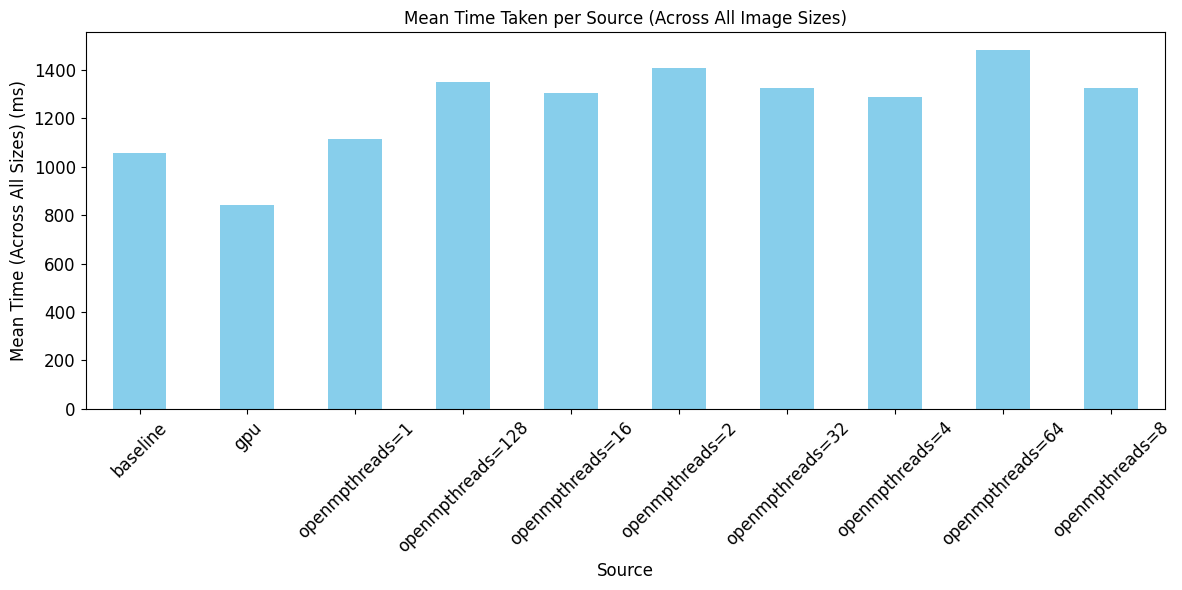

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
# Calculate the mean for all image sizes across Benchmark_Type
mean_values = df.groupby('Source').mean()

# Plotting the total mean time taken per source across all image sizes
plt.figure(figsize=(12, 6))
mean_values_sum = mean_values.sum(axis=1)  # Sum across all image sizes for each source
mean_values_sum.plot(kind='bar', color='skyblue')

# Plot details
plt.title('Mean Time Taken per Source (Across All Image Sizes)',fontsize=12)
plt.xlabel('Source',fontsize=12)
plt.ylabel('Mean Time (Across All Sizes) (ms)',fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


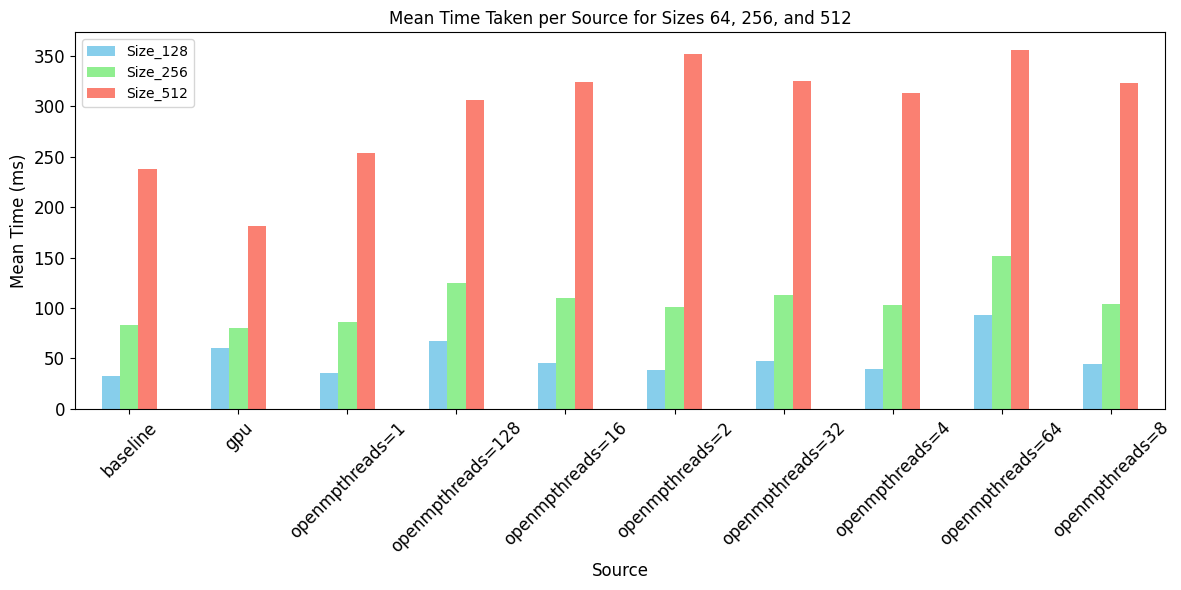

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
# Group by 'Source' and calculate the mean for 'Size_64', 'Size_256', and 'Size_512'
sizes_to_plot = ['Size_128','Size_256','Size_512']
mean_values = df.groupby('Source')[sizes_to_plot].mean()

# Plotting the mean time taken per source for Sizes 64, 256, and 512
mean_values.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen', 'salmon'])

# Plot details
plt.title('Mean Time Taken per Source for Sizes 64, 256, and 512',fontsize=12)
plt.xlabel('Source',fontsize=12)
plt.ylabel('Mean Time (ms)',fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


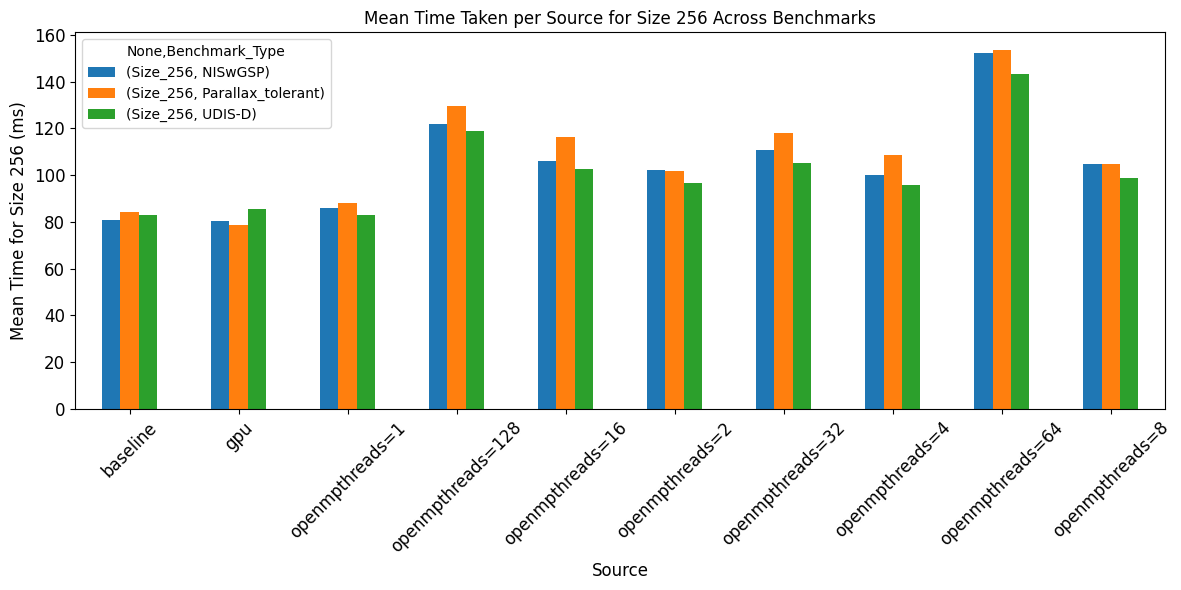

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
# Filter for Size_256 and group by Source and Benchmark_Type
size_256_df = df[['Source', 'Benchmark_Type', 'Size_256']]

# Calculate the mean of Size_256 per Benchmark_Type for each Source
mean_size_256 = size_256_df.groupby(['Source', 'Benchmark_Type']).mean().unstack()

# Plotting the mean time taken per Source for Size_256 across each Benchmark_Type
mean_size_256.plot(kind='bar', figsize=(12, 6))

# Plot details
plt.title('Mean Time Taken per Source for Size 256 Across Benchmarks',fontsize=12)
plt.xlabel('Source',fontsize=12)
plt.ylabel('Mean Time for Size 256 (ms)',fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()
